# Computação algébrica

Este trabalho tem a função de completar o trabalho escrito. Foi realizado com a linguagem de programação [Python 3.6](https://www.python.org/) com auxílio da biblioteca [SymPy](http://www.sympy.org/pt/index.html) para a computação de funções, através do IDE [Jupyter Notebook](http://jupyter.org/).

### Índice
* [1. Definições algorítmicas](#1.-Definições-algorítmicas)
* [1.1 Preparação do ambiente](#1.1-Preparação-do-ambiente)
* [1.1.1 Gerador de gráficos](#1.1.1-Gerador-de-gráficos)
* [2. Definições matemáticas](#2.-Definições-matemáticas)
* [3. Solução Geral](#3.-Solução-Geral)
* [3.1 Definindo símbolos e funções](#3.1-Definindo-símbolos-e-funções)
* [3.2 Definindo constantes](#3.2-Definindo-constantes)
* [3.3 Definindo p](#3.3-Definindo-p)
* [3.4 Definindo q](#3.4-Definindo-q)
* [3.5 Escrevendo a EDO](#3.5-Escrevendo-a-EDO)
* [3.6 Encontrando a Solução Geral para a EDO](#3.6-Encontrando-a-Solução-Geral-para-a-EDO)
* [4. Soluções Parciais](#4.-Soluções-Parciais)
* [4.1 Solução Parcial 1](#4.1-Solução-Parcial-1)
* [4.1.1 SP1 em 30 minutos](#4.1.1-SP1-em-30-minutos)
* [4.1.2 Gráfico](#4.1.2-Gráfico)
* [4.2 Solução Parcial 2](#4.2-Solução-Parcial-2)
* [4.2.1 SP2 em 30 minutos](#4.2.1-SP2-em-30-minutos)
* [4.2.2 Gráfico](#4.2.2-Gráfico)
* [4.3 Solução Parcial 3](#4.3-Solução-Parcial-3)
* [4.3.1 SP3 em 30 minutos](#4.3.1-SP3-em-30-minutos)
* [4.3.2 Gráfico](#4.3.2-Gráfico)
* [4.4 Solução Parcial 4](#4.4-Solução-Parcial-4)
* [4.4.1 SP4 em 30 minutos](#4.4.1-SP4-em-30-minutos)
* [4.4.2 Gráfico](#4.4.2-Gráfico)
* [4.5 Solução Parcial 5](#4.5-Solução-Parcial-5)
* [4.5.1 SP5 em 30 minutos](#4.5.1-SP5-em-30-minutos)
* [4.5.2 Gráfico](#4.5.2-Gráfico)
* [5. Comparação gráfica entre as Soluções Parciais](#5.-Comparação-gráfica-entre-as-Soluções-Parciais)

## 1. Definições algorítmicas
* [Índice](#Computação-algébrica)

### 1.1 Preparação do ambiente

Definindo os pacotes que serão utilizados para a realização da computação simbólica.

In [1]:
from sympy import *
init_printing()

#### 1.1.1 Gerador de gráficos

Para visulizar de maneira gráfica as funções, será gerado um gráfico para o intervalo $t=0$ até $t=120$:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-paper')


def grafico_mtpl(func, mostrar=True, nome=None):
    func = func.rhs
    t = Symbol('t')
    lam_x = lambdify(t, func, modules=['numpy'])
    eixo_x = np.linspace(0, 120, num=1000)
    eixo_y = lam_x(eixo_x)
    plt.grid(True, linestyle=':')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    axes = plt.gca()
    axes.set_xlim([-5, 125])
    axes.set_ylim([-5, 180])
    plt.xlabel('tempo (min)', fontsize=10)
    plt.ylabel('concentração (kg)', fontsize=10)
    if nome is not None:
        plt.plot(eixo_x, eixo_y, label=nome)
        plt.legend(prop={'size': 10})
    else:
        plt.plot(eixo_x, eixo_y)
    if mostrar:
        plt.show()

## 2. Definições matemáticas
* [Índice](#Computação-algébrica)


- Volume inicial: $V_{0}=100 l$

- Quantidade de sal inicial: $A_{0}=10 kg$

- Vazão de entrada: $r_{e}=6 l/min$

- Vazão de saída: $r_{s}=4 l/min$

- Concentração que entra: $C_{e}=0,5 kg/l$


$$p(t)=\frac{r_{s}}{V_{0}+(r_{e}-r_{s})t}$$

$$q(t)=C_{e}r_{e}$$

## 3. Solução Geral
* [Índice](#Computação-algébrica)

É importante notar que, aqui, $C=C_{m}+50^{3}$, onde, $C_{m}$ é o termo encontrado e utilizado na parte escrita dete trabalho.

### 3.1 Definindo símbolos e funções

In [3]:
t, C1 = symbols('t C1')
A, p, q =  symbols('A p q', cls = Function, Function = True)

### 3.2 Definindo constantes

In [4]:
V0 = 100
A0 = 10
re = 6
rs = 4
Ce = 0.5

### 3.3 Definindo p

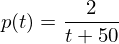

In [5]:
Pt = sympify(rs / (V0 + (re - rs) * t))
Pt = simplify(Pt)
Eq(p(t), Pt)

### 3.4 Definindo q

In [6]:
Qt = Ce * re
Eq(q(t), Qt)

### 3.5 Escrevendo a EDO

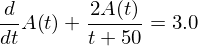

In [7]:
equacao = Eq(Derivative(A(t)) + Pt * A(t), Qt)
equacao

### 3.6 Encontrando a Solução Geral para a EDO
_\*\*Magic!\*\*_

In [8]:
# classificando a EDO, retorna todos os possíveis métodos
# de resolução, ordenado do método mais silples e direto
# ao mais complicado e demorado

EDO_classe = classify_ode(equacao, A(t))
for i in EDO_classe: print(i)

1st_exact
1st_linear
Bernoulli
almost_linear
1st_power_series
lie_group
1st_exact_Integral
1st_linear_Integral
Bernoulli_Integral
almost_linear_Integral


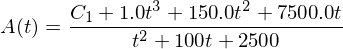

In [9]:
# resolvendo a EDO, usando, automaticamente, a primeira
# classificação do método acima

difSG = simplify(dsolve(equacao, A(t)))
difSG

## 4. Soluções Parciais

### 4.1 Solução Parcial 1
* [Índice](#Computação-algébrica)

$SP_{1} = A_{1}$

$A_{1}(0)=10kg$

In [10]:
# encontrando o valor de C
const1 = solve([difSG.subs(t, 0).subs(A(0), 10)])
const1

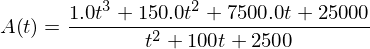

In [11]:
# encontrando SP através do C
SP1 = simplify(difSG.subs(const1))
SP1

#### 4.1.1 SP1 em 30 minutos

In [12]:
SP130 = solve(SP1.subs(t, 30))
SP130[0]

#### 4.1.2 Gráfico

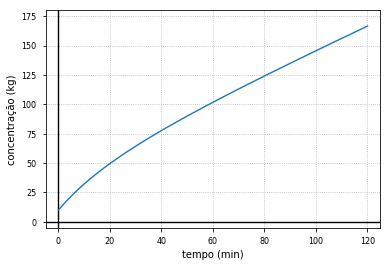

In [13]:
grafico_mtpl(SP1)

### 4.2 Solução Parcial 2
* [Índice](#Computação-algébrica)

$SP_{2} = A_{2}$

$A_{2}(0)=0kg$


In [14]:
# encontrando o valor de C
const2 = solve([difSG.subs(t, 0).subs(A(0), 0)])
const2

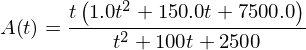

In [15]:
# encontrando SP através do C
SP2 = simplify(difSG.subs(const2))
SP2

#### 4.2.1 SP2 em 30 minutos

In [16]:
SP230 = solve(SP2.subs(t, 30))
SP230[0]

#### 4.2.2 Gráfico

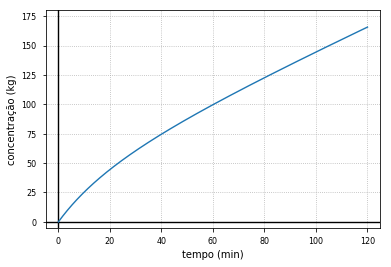

In [17]:
grafico_mtpl(SP2)

### 4.3 Solução Parcial 3
* [Índice](#Computação-algébrica)

$SP_{3} = A_{3}$

$A_{3}(0)=5kg$


In [18]:
# encontrando o valor de C
const3 = solve([difSG.subs(t, 0).subs(A(0), 5)])
const3

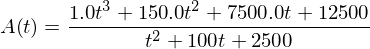

In [19]:
# encontrando SP através do C
SP3 = simplify(difSG.subs(const3))
SP3

#### 4.3.1 SP3 em 30 minutos

In [20]:
SP330 = solve(SP3.subs(t, 30))
SP330[0]

#### 4.3.2 Gráfico

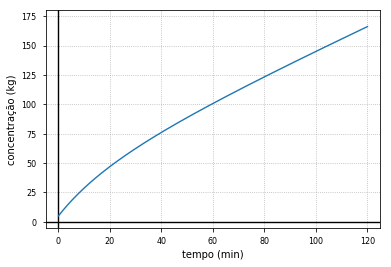

In [21]:
grafico_mtpl(SP3)

### 4.4 Solução Parcial 4
* [Índice](#Computação-algébrica)

$SP_{4} = A_{4}$

$A_{4}(0)=50kg$


In [22]:
# encontrando o valor de C
const4 = solve([difSG.subs(t, 0).subs(A(0), 50)])
const4

In [23]:
# encontrando SP através do C
SP4 = simplify(difSG.subs(const4))
SP4

#### 4.4.1 SP4 em 30 minutos

In [24]:
SP430 = solve(SP4.subs(t, 30))
SP430[0]

#### 4.4.2 Gráfico

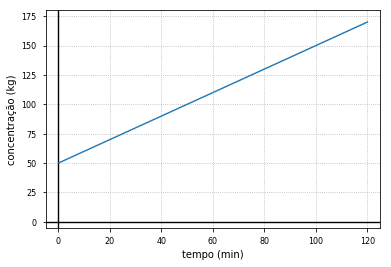

In [25]:
grafico_mtpl(SP4)

### 4.5 Solução Parcial 5
* [Índice](#Computação-algébrica)

$SP_{5} = A_{5}$

$A_{5}(0)=100kg$

In [26]:
# encontrando o valor de C
const5 = solve([difSG.subs(t, 0).subs(A(0), 100)])
const5

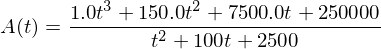

In [27]:
# encontrando SP através do C
SP5 = simplify(difSG.subs(const5))
SP5

#### 4.5.1 SP5 em 30 minutos

In [28]:
SP530 = solve(SP5.subs(t, 30))
SP530[0]

#### 4.5.2 Gráfico

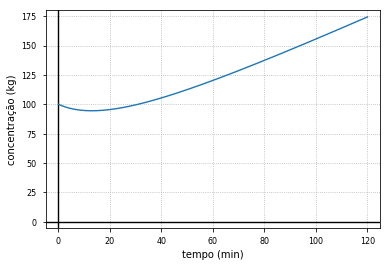

In [29]:
grafico_mtpl(SP5)

## 5. Comparação gráfica entre as Soluções Parciais
* [Índice](#Computação-algébrica)

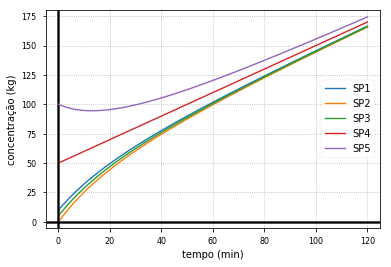

In [30]:
grafico_mtpl(SP1, False, 'SP1')
grafico_mtpl(SP2, False, 'SP2')
grafico_mtpl(SP3, False, 'SP3')
grafico_mtpl(SP4, False, 'SP4')
grafico_mtpl(SP5, False, 'SP5')

.